In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


## **Obter Dados**

Começamos por dar load dos dados.

In [2]:
# Substitua pelo caminho do seu arquivo
df = pd.read_csv("datasets/train_radiomics_hipocamp.csv")
test_DShippo = pd.read_csv("datasets/test_radiomics_hipocamp.csv")

df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/train_radiomics_hipocamp.csv'

In [68]:
# Primeiras linhas
df.head()

,ID,Image,Mask,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,...,lbp-3D-k_glszm_ZonePercentage,lbp-3D-k_glszm_ZoneVariance,lbp-3D-k_ngtdm_Busyness,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength,Sex,Age,Transition
0,006_S_0681,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.007881,345733.167092,479.414935,0.001538,0.183049,0.017044,0.001581,0,77.1,CN-CN
1,941_S_1203,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.013112,244310.331892,378.001763,0.001761,0.146021,0.010782,0.001813,1,83.4,CN-CN
2,011_S_0003,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.011331,222776.529605,497.261162,0.001567,0.190309,0.019644,0.001596,1,81.3,AD-AD
3,057_S_0779,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.012197,280222.663268,406.837667,0.001629,0.148247,0.010824,0.001677,1,79.6,CN-MCI
4,033_S_0920,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.010859,216779.591479,368.838125,0.001912,0.174701,0.014793,0.001979,0,80.1,CN-CN


In [69]:
# Descrição das colunas
df.describe()

,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,...,lbp-3D-k_glszm_ZoneEntropy,lbp-3D-k_glszm_ZonePercentage,lbp-3D-k_glszm_ZoneVariance,lbp-3D-k_ngtdm_Busyness,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength,Sex,Age
count,305.0,305.000000,305.0,305.000000,305.000000,305.0,305.000000,305.000000,305.000000,305.000000,...,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,3.0,5.810469,0.0,173.504918,6714.790164,2.0,0.411819,0.096916,10.137707,104.883349,...,2.681657,0.010477,266015.006289,362.064990,0.002024,0.155767,0.012415,0.002091,0.567213,75.171148
std,0.0,0.613858,0.0,24.108871,1066.815670,0.0,0.028993,0.009739,0.911329,6.180335,...,0.259507,0.002009,59267.210682,102.133366,0.000531,0.024285,0.003814,0.000552,0.496276,6.675866
min,3.0,4.321602,0.0,128.000000,3609.000000,2.0,0.330890,0.075142,8.420713,90.675836,...,1.984788,0.005818,138177.996378,130.618182,0.001137,0.071124,0.002565,0.001168,0.000000,55.300000
25%,3.0,5.317298,0.0,157.000000,5941.000000,2.0,0.392944,0.089977,9.525253,100.501871,...,2.507947,0.009060,225781.559367,285.617369,0.001632,0.140791,0.009751,0.001688,0.000000,71.300000
50%,3.0,5.811449,0.0,172.000000,6723.000000,2.0,0.412479,0.096609,10.106838,104.370667,...,2.688709,0.010580,259226.493061,353.841144,0.001934,0.156580,0.012297,0.001995,1.000000,75.000000
75%,3.0,6.237751,0.0,190.000000,7396.000000,2.0,0.431621,0.102240,10.635093,108.677326,...,2.844025,0.011706,298836.166667,431.288497,0.002305,0.173700,0.015166,0.002373,1.000000,79.900000
max,3.0,7.583210,0.0,255.000000,9453.000000,2.0,0.491496,0.144082,14.370911,126.209296,...,3.494062,0.017015,465865.829238,670.406531,0.004325,0.223273,0.024548,0.004417,1.000000,91.000000


## **Tratamento de Dados**

In [70]:
# Valores nulos por coluna
df.isnull().sum()

ID                                  0
Image                               0
Mask                                0
diagnostics_Versions_PyRadiomics    0
diagnostics_Versions_Numpy          0
                                   ..
lbp-3D-k_ngtdm_Contrast             0
lbp-3D-k_ngtdm_Strength             0
Sex                                 0
Age                                 0
Transition                          0
Length: 2181, dtype: int64

In [71]:
# Identificar linhas duplicadas
duplicados = df.duplicated()
print(f"Linhas duplicadas: {duplicados.sum()}")  # Conta duplicados

Linhas duplicadas: 0


Tratar as colunas com valores constantes.

In [72]:
# Remover colunas constantes
df = df.loc[:, df.nunique() > 1]


print("Dimensão:", df.shape)

# Verificar se o dataframe ficou vazio
if df.shape[0] == 0:
    raise ValueError("O dataframe ficou vazio após o pré-processamento. Verifique as etapas.")


Dimensão: (305, 2022)


Corrigir a numeração da coluna ID.

In [73]:
# Mudar o id para numeros de 0 a 304
df['ID'] = pd.factorize(df['ID'])[0] + 1

display(df.head())

,ID,Image,Mask,diagnostics_Image-original_Hash,diagnostics_Image-original_Mean,diagnostics_Image-original_Maximum,diagnostics_Mask-original_Hash,diagnostics_Mask-original_BoundingBox,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_CenterOfMassIndex,...,lbp-3D-k_glszm_ZonePercentage,lbp-3D-k_glszm_ZoneVariance,lbp-3D-k_ngtdm_Busyness,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength,Sex,Age,Transition
0,1,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,b5d774a32163a7ee822d42a07808a787f8687f56,5.848123,178,315bdd7a06bb73df17bfc1297398b4398e36e180,"(103, 113, 93, 36, 30, 71)",7106,"(121.94230227976358, 129.27272727272728, 128.4...",...,0.007881,345733.167092,479.414935,0.001538,0.183049,0.017044,0.001581,0,77.1,CN-CN
1,2,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,397042d736bd790b7880b372b1749ff424f89cbe,5.238834,190,208a2b034b72592489315104ef526ca10d434f24,"(81, 127, 93, 47, 16, 73)",7779,"(107.06170458927883, 135.28088443244633, 128.2...",...,0.013112,244310.331892,378.001763,0.001761,0.146021,0.010782,0.001813,1,83.4,CN-CN
2,3,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,84d679a88812c4aaf03a6d99f00c913b2f64506f,6.816667,155,352220437f6381b051fd4173969519887b530df6,"(77, 119, 89, 49, 30, 81)",6707,"(103.3640972118682, 135.28164604144922, 128.98...",...,0.011331,222776.529605,497.261162,0.001567,0.190309,0.019644,0.001596,1,81.3,AD-AD
3,4,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,168f330d2ca3f097146e5d041f33b40672d230df,6.445162,171,9f62584e8badeb5de90b797d0c86c5170465d90f,"(93, 102, 90, 41, 29, 78)",8281,"(116.29827315541601, 118.67431469629271, 129.3...",...,0.012197,280222.663268,406.837667,0.001629,0.148247,0.010824,0.001677,1,79.6,CN-MCI
4,5,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,ea5f291ea107dfda5e5c725eae7c0555ced44ce4,5.568269,150,62ab23b0a4ea4c9e7574b1ea410bd90236fe1d6e,"(87, 119, 91, 40, 27, 75)",5986,"(108.26561977948546, 132.05462746408287, 127.6...",...,0.010859,216779.591479,368.838125,0.001912,0.174701,0.014793,0.001979,0,80.1,CN-CN


In [74]:
# Observar os data types 
display(df.dtypes)

ID                                   int64
Image                               object
Mask                                object
diagnostics_Image-original_Hash     object
diagnostics_Image-original_Mean    float64
                                    ...   
lbp-3D-k_ngtdm_Contrast            float64
lbp-3D-k_ngtdm_Strength            float64
Sex                                  int64
Age                                float64
Transition                          object
Length: 2022, dtype: object

Manter apenas as colunas numéricas.

In [75]:
# Selecionar colunas numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64'])

# Verificar as primeiras linhas do dataset filtrado
df = pd.concat([df_numerico, df['Transition']], axis=1)

df.shape

(305, 2015)

Para os testes de comparação definimos a correlação máxima de 0,85 e a variância minima de 0,01.

In [76]:
#ver a alta correlação, intervalos >= 0.85 e <= -0.85
def plot_high_correlation_intervals(df, correlation_threshold=0.85):
    # Calcular a matriz de correlação
    correlation_matrix = df.corr(numeric_only=True)
    
    # Selecionar a parte superior da matriz para evitar duplicatas
    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    
    # Filtrar correlações nos intervalos de interesse
    high_positive_corr = upper_triangle.stack()[(upper_triangle.stack() >= correlation_threshold)]
    high_negative_corr = upper_triangle.stack()[(upper_triangle.stack() <= -correlation_threshold)]
    
    # Criar os gráficos
    plt.figure(figsize=(10, 6))
    plt.hist(high_positive_corr, bins=20, color='green', alpha=0.7, edgecolor='black', label='Correlação >= 0.85')
    plt.hist(high_negative_corr, bins=20, color='red', alpha=0.7, edgecolor='black', label='Correlação <= -0.85')
    plt.title("Distribuição de Altas Correlações (>= 0.85 e <= -0.85)", fontsize=16)
    plt.xlabel("Correlação", fontsize=12)
    plt.ylabel("Frequência", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

#ver a variancia baixa <= 0.01
def plot_low_variance_interval(df, variance_threshold=0.01):
    # Calcular a variância
    numerical_cols = df.select_dtypes(include=['number'])  # Apenas colunas numéricas
    variances = numerical_cols.var()
    
    # Filtrar variâncias no intervalo de interesse
    low_variance_features = variances[variances <= variance_threshold]
    
    # Criar o gráfico
    plt.figure(figsize=(10, 6))
    plt.hist(low_variance_features, bins=20, color='blue', alpha=0.7, edgecolor='black', label=f"Variância <= {variance_threshold}")
    plt.title("Distribuição de Features com Baixa Variância (<= 0.01)", fontsize=16)
    plt.xlabel("Variância", fontsize=12)
    plt.ylabel("Número de Features", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

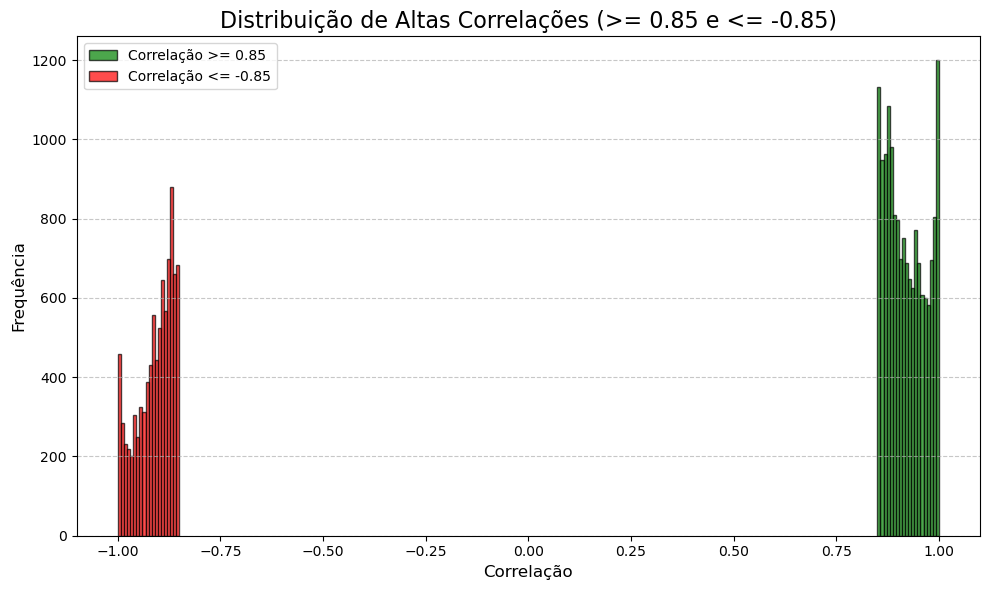

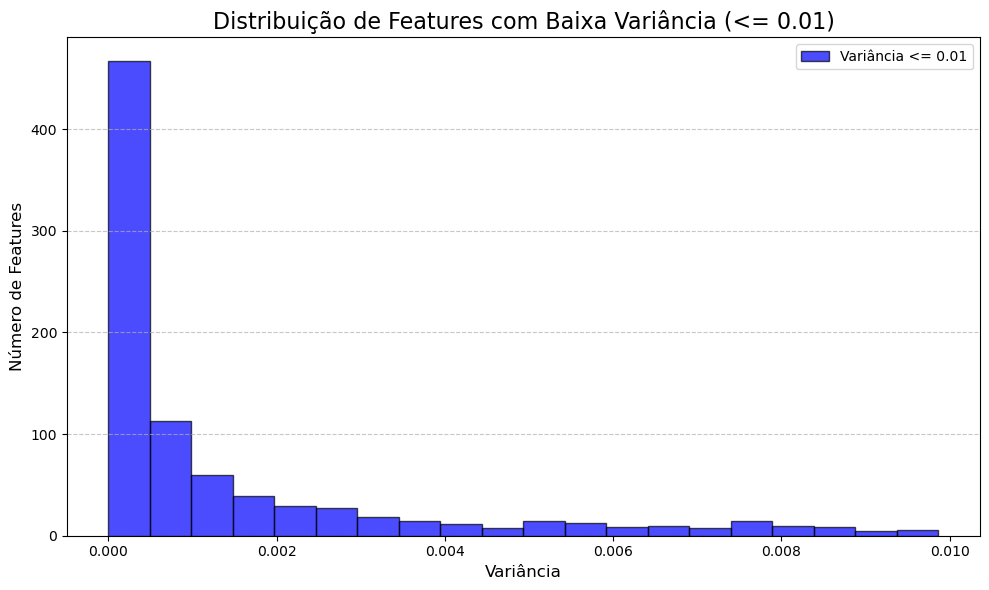

In [77]:
#executar as funções criadas
plot_high_correlation_intervals(df)
plot_low_variance_interval(df)

In [78]:
def preprocess_dataset(df, variance_threshold=0.01, correlation_threshold=0.85):
    """
    Pré-processar o dataset eliminando:
    1. Features com baixa variância.
    2. Features altamente correlacionadas.
    
    Args:
        df (pd.DataFrame): O dataset original.
        variance_threshold (float): Limite para considerar variância baixa.
        correlation_threshold (float): Limite para considerar correlação alta.

    Returns:
        pd.DataFrame: Dataset preprocessado.
        list: Features removidas por baixa variância.
        list: Features removidas por alta correlação.
    """
    # 1. Remover features com baixa variância
    numerical_cols = df.select_dtypes(include=['number'])  # Apenas colunas numéricas
    variances = numerical_cols.var()
    low_variance_features = variances[variances < variance_threshold].index
    df = df.drop(columns=low_variance_features, errors='ignore')  # Remover features de baixa variância

    # 2. Remover features altamente correlacionadas
    correlation_matrix = df.corr(numeric_only=True)  # Matriz de correlação
    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    
    # Identificar features com alta correlação
    high_corr_features = [column for column in upper_triangle.columns if any(abs(upper_triangle[column]) > correlation_threshold)]
    df = df.drop(columns=high_corr_features, errors='ignore')  # Remover features altamente correlacionadas

    return df, low_variance_features, high_corr_features

# Aplicar ao teu dataset
DShippo_cleaned, removed_low_variance, removed_high_corr = preprocess_dataset(df)

# Mostrar resultados
print(f"Features removidas por baixa variância (<{0.01}): {len(removed_low_variance)}")
print(f"Features removidas por alta correlação (|correlação| > {0.80}): {len(removed_high_corr)}")
print(f"Dimensões do dataset após limpeza: {DShippo_cleaned.shape}")

Features removidas por baixa variância (<0.01): 885
Features removidas por alta correlação (|correlação| > 0.8): 768
Dimensões do dataset após limpeza: (305, 362)


Vamos agora padronizar os dados.

In [79]:
# Criar o objeto StandardScaler
scaler = StandardScaler()

# Selecionar apenas colunas numéricas
colunas_numericas = df.select_dtypes(include=['float64', 'int64'])

# Aplicar standardização
df[colunas_numericas.columns] = scaler.fit_transform(colunas_numericas)

## **Testar os Modelos**

In [80]:
X = df.drop(columns=['Transition'])
y = df['Transition']

# Verificar dimensões de X e y
print("Dimensão de X:", X.shape)
print("Dimensão de y:", y.shape)


Dimensão de X: (305, 2014)
Dimensão de y: (305,)


In [81]:
# Balancear classes usando SMOTE
smote = SMOTE(random_state=42)

if X.shape[0] > 0:
    X, y = smote.fit_resample(X, y)
else:
    raise ValueError("O conjunto de dados ficou vazio após o pré-processamento.")


In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
print("Treino:", X_train.shape, y_train.shape)
print("Teste:", X_test.shape, y_test.shape)


Treino: (360, 2014) (360,)
Teste: (120, 2014) (120,)


Testamos os diferentes modelos para ver qual é o melhor.

In [83]:
ensemble = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('dtc', DecisionTreeClassifier(random_state=42)),
        ('lr', LogisticRegression(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    voting='soft'
)
ensemble.fit(X_train, y_train)


c:\Users\rafaa\miniconda3\envs\mypython3version\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('dtc', DecisionTreeClassifier(random_state=42)),
                             ('lr', LogisticRegression(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [84]:
y_pred = ensemble.predict(X_test)

from sklearn.metrics import classification_report
print("\nRelatório de Classificação com melhores hiperparâmetros:")
print(classification_report(y_test, y_pred))


Relatório de Classificação com melhores hiperparâmetros:
              precision    recall  f1-score   support

       AD-AD       0.68      0.79      0.73        24
       CN-CN       0.75      0.50      0.60        24
      CN-MCI       0.96      1.00      0.98        24
      MCI-AD       0.61      0.58      0.60        24
     MCI-MCI       0.68      0.79      0.73        24

    accuracy                           0.73       120
   macro avg       0.74      0.73      0.73       120
weighted avg       0.74      0.73      0.73       120



Procuramos então quais os melhores parâmetros para maximizar a accuracy do modelo.

In [85]:
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42), 
    param_grid, 
    cv=5, 
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)
print("Melhores parâmetros do Decision Tree:", grid_search.best_params_)


Melhores parâmetros do Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


## **Ficheiro de Submissão**

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

test_DShippo = pd.read_csv("datasets/test_radiomics_hipocamp.csv")

# 2. Preparar os dados (ajuste conforme necessário)
# Exemplo: Separar X e y no conjunto de treinamento
X = df.drop(columns=['Transition'])  # Substitua 'Transition' pelo nome correto da coluna de rótulo
y = df['Transition']

# Remover colunas em que todos os valores são iguais
columns_nunique_2 = test_DShippo.columns[test_DShippo.nunique() == 1]
test_DShippo = test_DShippo.drop(columns=columns_nunique_2)

# Transformar a coluna 'ID' em valores numéricos
test_DShippo['ID'] = pd.factorize(test_DShippo['ID'])[0] + 1

# Selecionar apenas as colunas numéricas
colunas_numericas1 = test_DShippo.select_dtypes(include=['number']).columns.tolist()  # Converter para lista

# Adicionar a coluna 'Transition' se ela estiver presente
if 'Transition' in test_DShippo.columns:
    colunas_numericas1.append('Transition')

# Criar um novo DataFrame com as colunas numéricas e 'Transition'
# Filtrar apenas colunas que estão no DataFrame
colunas_validas = [col for col in colunas_numericas1 if col in test_DShippo.columns]


# Indexar o DataFrame com as colunas válidas
test_DShippo_filtered = test_DShippo[colunas_validas]

# 4. Prever no conjunto de teste
# Prepare os dados de teste da mesma forma que os dados de treinamento
X_test = test_DShippo_filtered

# Dividir os dados em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Treinar o modelo
ensemble.fit(X_train, y_train)

y_val_pred = ensemble.predict(X_val)
print(classification_report(y_val, y_val_pred))
print(f"Accuracy: {accuracy_score(y_val, y_val_pred)}")

# Garantir que as colunas do conjunto de teste sejam as mesmas do treino
X_test = X_test[X_train.columns]

# Prever no conjunto de teste
test_predictions = ensemble.predict(X_test)


# 5. Criar o DataFrame de submissão
submission = pd.DataFrame({
    'RowId': test_DShippo['ID'],  # Manter a coluna de identificação
    'Result': test_predictions  # Nome correto para o rótulo previsto
})

# 6. Salvar o arquivo
submission.to_csv('datasets_alterados/dummy_submission.csv', index=False)

print('Arquivo dummy_submission.csv criado com sucesso.')

c:\Users\rafaa\miniconda3\envs\mypython3version\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

       AD-AD       0.43      0.46      0.44        13
       CN-CN       0.64      0.67      0.65        21
      MCI-AD       0.38      0.27      0.32        11
     MCI-MCI       0.29      0.31      0.30        16

    accuracy                           0.46        61
   macro avg       0.43      0.43      0.43        61
weighted avg       0.46      0.46      0.46        61

Accuracy: 0.45901639344262296
Arquivo dummy_submission.csv criado com sucesso.
